# Исследование объявлений о продаже квартир

 ## 1 Описание проекта 
 
     В моём распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости

    Цель исследования - проанализировать данные, определить параметры, влияющие на стоимость объектов недвижимости, дать практические рекомендации для бизнеса
    
    
    
  ## 2 Описание данных

   * airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
   * balcony — число балконов
   * ceiling_height — высота потолков (м)
   * cityCenters_nearest — расстояние до центра города (м)
   * days_exposition — сколько дней было размещено объявление (от публикации до снятия)
   * first_day_exposition — дата публикации
   * floor — этаж
   * floors_total — всего этажей в доме
   * is_apartment — апартаменты (булев тип)
   * kitchen_area — площадь кухни в квадратных метрах (м²)
   * last_price — цена на момент снятия с публикации
   * living_area — жилая площадь в квадратных метрах (м²)
   * locality_name — название населённого пункта
   * open_plan — свободная планировка (булев тип)
   * parks_around3000 — число парков в радиусе 3 км
   * parks_nearest — расстояние до ближайшего парка (м)
   * ponds_around3000 — число водоёмов в радиусе 3 км
   * ponds_nearest — расстояние до ближайшего водоёма (м)
   * rooms — число комнат
   * studio — квартира-студия (булев тип)
   * total_area — общая площадь квартиры в квадратных метрах (м²)
   * total_images — число фотографий квартиры в объявлении
    
    

    Ход исследования содержит следующие этапы: 
    
 1) Загрузка данных
 
 2) Предобработка данных 
 
 3) Исследовательский анализ данных 
 
 4) Общий вывод

## 3 Шаг 1.  Загрузка данных

Загрузим библиотеки, которые будут необходимы для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

Загрузим данные из файла в датафрейм

In [2]:
server_path = '/datasets/real_estate_data.csv'   

local_path= 'C:\\Users\\user\\Documents\\real_estate_data.csv'     

try:
    df = pd.read_csv(server_path, sep='\t')   
except: 
    df = pd.read_csv(local_path, sep='\t')

  Воспользуемся методом sample() для вывода случайной строки датафрейма

In [3]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16735,12,3900000.0,56.0,2017-03-09T00:00:00,2,2.7,12.0,32.0,1,NaN,...,10.0,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,383.0


 Ознакомимся с типом данных и изучим общую информацию о датасете, применив метод info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

    Видим, что общий объем хранимых в датасете данных составил 3.7 MB. 
    
    Всего в датафрейме 2 столбца с булевым типом данных(studio, open_plan);  14 столбцов с вещественным типом данных float(last_price, total_area, ceiling_height, floors_total, living_area , kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition); 3 с столбца с целочисленным типом данных Int(total_images,  rooms,  floor); 3 столбца с типом object(first_day_exposition, is_apartment, locality_name)

 Изучим первые пять и последние пять строк датафрейма и выведем их на экран

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Построим общую гистограмму для всех числовых столбцов таблицы

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

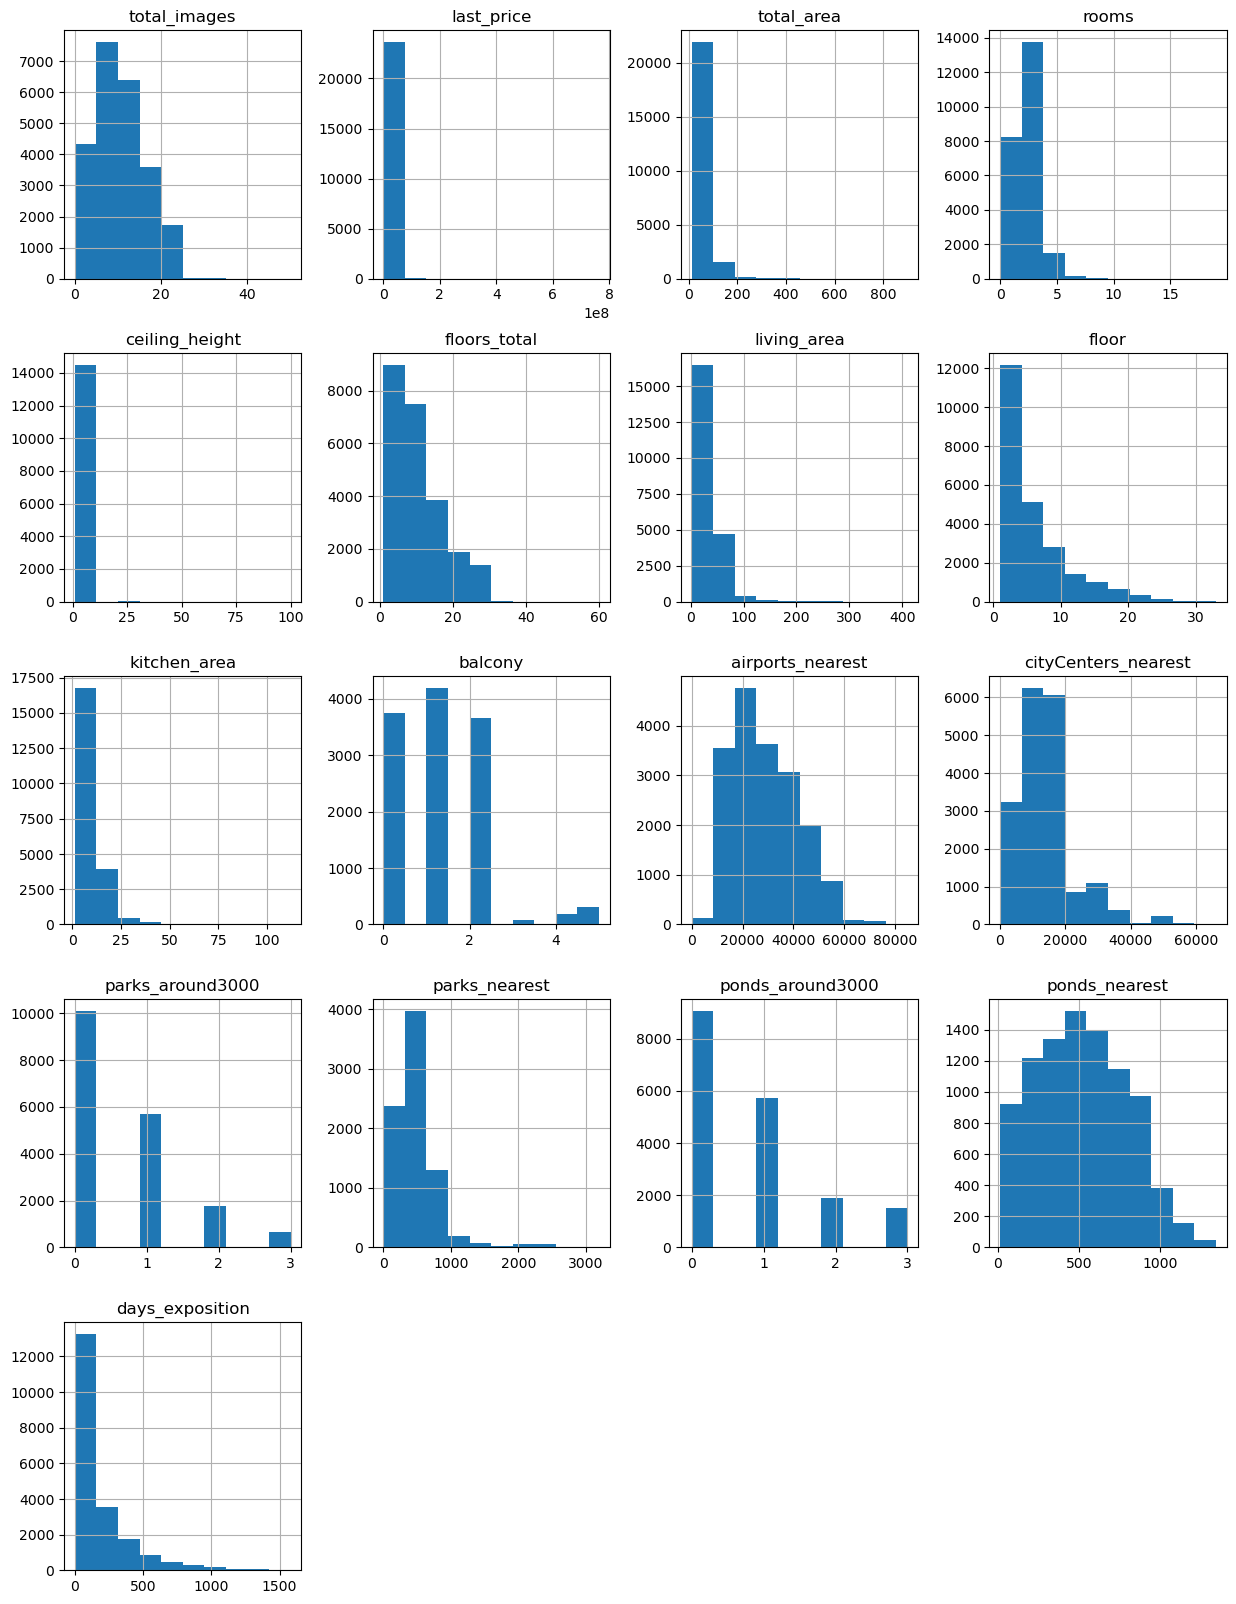

In [7]:
df.hist(figsize=(15, 20))

     Вывод по загрузке данных: 
    
    По итогам первичного знакомства с данными я обнаружил , что всего в датасете 23699 записей. Общий объем данных в датасете 3.7 MB.
    Его можно оптимизировать, изменив тип данных для некоторых столбцов в  следующем шаге исследования.

## 4  Шаг 2.Предобработка данных 

Изучим пропущенные значения в столбцах. Определим, в каких столбцах есть пропуски. 

 Перед тем, как начать предобработку данных проверим наш датафрейм на наличие явных дубликатов. 

In [8]:
df.duplicated().sum()

0

Явных дубликатов нет. Можно двигаться дальше. 

Посчитаем количество пропущенных значений.

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

  Глядя на таблицу можно заметить, что в некоторых столбцах есть пропущенные значения.
  К ним относятся:
  
 * ceiling_height(9195 пропущенных значений), 
 * floors_total (86 пропущенных значений), 
 * living_area (1903 пропущенных значений), 
 * kitchen_area(2278 пропущенных значений),
 * balcony (11519 пропущенных значений),
 * locality_name(49 пропущенных значений),
 * airports_nearest(5542 пропущенных значений), 
 * cityCenters_nearest(5519 пропущенных значений),
 * parks_around3000(5518 пропущенных значений),
 * parks_nearest (15620 пропущенных значений), 
 * ponds_around3000 (5518 пропущенных значений),
 * ponds_nearest (14589 пропущенных значений),
 * days_exposition(3181 пропущенных значений)
 * is_apartment(20924 пропущенных значений)
 
 
  В столбце ceiling_height допускаю, что продавцы забывают указать высоту потолка. Это полностью случайный тип пропусков.
  
  Также к полностью случайному типу пропусков можно отнести пропуски в столбце floors_total, ведь продавец мог попросту не посчитать нужным, либо забыть указать количество этажей в доме.
  
  В столбце living_area присутствуют 1903 пропущенных значения, также предполагаю, что продавец забыл указать жилую площадь квартиры. Это полностью случайный тип пропусков.
  
  В столбце kitchen_area могли возникнуть пропущенные значения из-за того, что продавец не указал площадь кухни. Это полностью случайный тип пропусков.
  
  В столбце balcony есть пропуски. Продавец мог забыть указать число балконов. Если балкон был в наличии, то продавец указал бы в графе. Если же значение пропущено, то балконов нет. Это неслучайный тип пропусков.
  
  В столбце locality_name продавец мог забыть указать название города, поэтому здесь возникли пропуски. Это также полностью случайный тип пропусков.
  
  В столбце airports_nearest продавец мог посчитать ненужным или вовсе забыл  указать расстояние до ближайшего аэропорта. Это полностью случайный тип прпоусков.
  
  В столбце cityCenters_nearest есть пропуски, могу сделать предположение, что продавец забыл указать значение в данном столбце. Это полностью случайный тип пропусков.
  
  Столбцы parks_nearest и parks_around3000 взаимосвязаны между собой, поэтому пропуски в одном столбце непременно ведут к тому, что есть пропуски в другом. Продавец мог забыть указать расстояние до ближайшего парка, соответственно будут пропуски и в parks_around3000. Это неслучайный тип пропусков.
  
   К неслучайному типу пропусков можно отнести также пропуски в столбцах ponds_around3000, ponds_nearest. Если продавец не указал число водоёмов в радиусе 3 км, соответсвтенно он не указал и расстояние до ближайшего водоёма. 
   
   В столбце days_exposition присутствуют пропуски. Возможно продавец случайным образом добавил объявление и тут же его удалил, поэтому определить количество дней размещения объявления проблематично. Это полностью случайный тип пропусков.
   
  В столбце is_apartment есть пропуски. Продавец мог посчитать что жилье не является апартаментами, в противном случае он заполнил бы данные. Это неслучайный тип пропусков. 

## 5 2.1  Типы данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## 6 2.2  Поменяем тип данных для  
* is_apartment на bool
* last_price - int
* first_day_exposition - date 
* floors_total - int
* balcony - int
* days_exposition - int
* cityCenters_nearest на int 

Здесь тип данных необходимо изменить на bool. Также нулевые значения будем заменять значением False, предполагая что если жилье не считается апартаментами, то человек не будет заполнять данную графу. 

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 Столбец 'last_price' отображает цену на момент снятия с публикации.  Приведём к типу данных int.

In [12]:
df['last_price'] = df['last_price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец first_day_exposition содержит даты публикаций объявлений, но он имеет тип данных object. Изменим тип данных на datetime.

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

    В столбце floors_total указано количество этажей в доме. Будем учитывать, что всего пропущенных значений 86, и доля от общего числа пропущенных значений 0,3 %. Поэтому с моей точки зрения целесообразно удалить данную строку, так как зависимость от других данных выявить не получится. Оставляем пропуски без изменений.

In [14]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'] = df['floors_total'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В Столбце 'balcony' поменяем тип данных на int. Будем также учитывать, если бы балкон был в наличии, то об этом указали бы  в соответствующей графе

In [15]:
df['balcony'] = df['balcony'].fillna(0).astype('int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В столбце 'days_exposition' содержится информация о том, сколько дней было размещено объявление. В столбце есть пропущенные значения . Возможно квартиру продали в тот же день, что и опубликовали объявление или что на момент выгрузки данных объявление не было снято, то есть квартира не продана. Поэтому не будем торопиться.

In [16]:
df['days_exposition'] = df['days_exposition'].fillna(0)
df['days_exposition'] = df['days_exposition'].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

## 7 2.3 Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты 

In [17]:
df['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

 Применив метод unique() к столбцу locality_name я обнаружил, что встречаются два похожих названия: "посёлок Рябово" и "посёлок городского типа Рябово". В яндекс.картах я обнаружил, что это два разных населённых пункта, поэтому можно сказать что они не являются дубликатами. Также обнаружил, что встречаются похожие названия, такие как 'поселок Тельмана' и 'посёлок Тельмана', 'поселок Пансионат Зелёный Бор' и 'посёлок Пансионат Зелёный Бор'. Применим метод str.replace() для замены значений в столбце 'locality_name'


In [18]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок')
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Вывод по предобработке данных:   
 
    Все нужные столбцы были заполнены данными и приведены к тому типу данных, который изначально подразумевался в данных столбцах. Далее можно переходить к следующим шагам нашего исследования.
    

## 8  Шаг 3. Расчёты и добавление результатов в таблицу 

По заданию заказчика необходимо рассчитать и добавить в таблицу: 
    
    1.цена одного квадратного метра;
    2.день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    3.месяц публикации объявления;
    4.год публикации объявления;
    5.тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    6.расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

 Посчитаем цену одного квадратного метра и добавим соответствующий столбец в таблицу. Сразу присвоим новому столбцу тип данных int. Также выведем срез данных, чтобы проверить правильность расчетов.

In [19]:
df['price_per_area'] = (df['last_price'] / df['total_area']).astype('int')
df[['total_area', 'last_price','price_per_area']].head()

,total_area,last_price,price_per_area
0,108.0,13000000,120370
1,40.4,3350000,82920
2,56.0,5196000,92785
3,159.0,64900000,408176
4,100.0,10000000,100000


  Добавим столбец день недели ('first_exposition_day_of_week'), месяц (first_exposition_month), год('first_exposition_year'). По аналогии с предыдущим расчетом, выведем срез данных, чтобы проверить всё ли получилось сделать верно.



In [20]:
df['first_exposition_day_of_week'] = df['first_day_exposition'].dt.weekday  
df['first_exposition_month'] = df['first_day_exposition'].dt.month
df['first_exposition_year'] = df['first_day_exposition'].dt.year
df[['first_day_exposition', 'first_exposition_day_of_week', 'first_exposition_month', 'first_exposition_year']].head()

,first_day_exposition,first_exposition_day_of_week,first_exposition_month,first_exposition_year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


    Для добавления этажа квартиры напишем функцию get_floor_type, которая по floor возвращает тип: первый(first), последний(last), другой(other)

In [21]:
def get_floor_type(row): 
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == floors_total:
        return('последний')
    elif 1 < floor < floors_total:
        return('другой')
df['floor_type'] = df.apply(get_floor_type,axis=1)


    Посчитаем соотношение жилой и общей площади. Для этого поделим living_area на total_area и сохраним результат в переменной living_total_ratio. Выведем первые 5 строк датафрейма, чтобы проверить добавление нового столбца 'living_total_ratio'.

In [22]:
df['living_total_ratio'] = df['living_area'] / df['total_area']
df[['living_area', 'total_area', 'living_total_ratio']].head()

,living_area,total_area,living_total_ratio
0,51.0,108.0,0.472222
1,18.6,40.4,0.460396
2,34.3,56.0,0.612500
3,NaN,159.0,NaN
4,32.0,100.0,0.320000


    Посчитаем соотношение площади кухни к общей площади. Для этого поделим kitchen_area на total_area и сохраним результат в переменной kitchen_total_ratio. Выведем первые 5 строк датафрейма, чтобы проверить добавление столбца kitchen_total_ratio

In [23]:
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']
df[['kitchen_area', 'total_area', 'kitchen_total_ratio']].head()

,kitchen_area,total_area,kitchen_total_ratio
0,25.0,108.0,0.231481
1,11.0,40.4,0.272277
2,8.3,56.0,0.148214
3,NaN,159.0,NaN
4,41.0,100.0,0.410000


In [24]:
df['center_distance_km'] = df['cityCenters_nearest'] / 1000
df['center_distance_km'] = df['center_distance_km'].round().astype('Int64')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_area,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_type,living_total_ratio,kitchen_total_ratio,center_distance_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,120370,3,3,2019,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81,82920,1,12,2018,первый,0.460396,0.272277,19
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558,92785,3,8,2015,другой,0.612500,0.148214,14
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424,408176,4,7,2015,другой,NaN,NaN,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000,1,6,2018,другой,0.320000,0.410000,8


   # Вывод по расчетам и добавлением данных в таблицу: 
    В нашу таблицу(df) добавили следующие столбцы 'price_per_area'-цена одного квадратного метра; 'first_exposition_day_of_week' - день недели публикации; 'first_exposition_month' - месяц публикации объявления; 'first_exposition_year' - год публикации объявления. Для добавления типа этажа квартиры была написана функция get_floor_type и проверена верность ее выполнения. Также добавлен столбец 'living_total_ratio', отображающий соотношение жилой и общей площади и 'kitchen_total_ratio',отображающий соотношение площади кухни к общей площади.

## 9  Шаг 4. Исследовательский анализ данных

Целью исследовательского анализа данных является изучение и построение гистограмм для каждого из следующих параметров:
   общая площадь;
   жилая площадь;
   площадь кухни;
   цена объекта;
   количество комнат;
   высота потолков;
   этаж квартиры;
   тип этажа квартиры («первый», «последний», «другой»);
   общее количество этажей в доме;
   расстояние до центра города в метрах;
   расстояние до ближайшего аэропорта;
   расстояние до ближайшего парка;
   день и месяц публикации объявления.

   ## 10  4.1  Построим гистограмму для следующих параметров: total_area, last_price, rooms, ceiling_height.  

    Применим метод describe() к каждому параметруб чтобы узнать краткую статистическую сводку для данных. 
    Округлим значения с помощью метода round() и приведем к целочисленному типа с помощью метода astype(int).

    В последующем исследовательском анализе данных  мы выясним, что есть аномальные значения среди квартир по определенным параметрам(слишком завышенная стоимость, высота потолка, общая площадь, количество комнат).

In [25]:
# Посчитаем общий процент отбрасываемых данных. Сделаем срез данных с несколькими условиями одновременно. Если процент менее 10, то можно удалить данные.
len(df.query('total_area > 200 or last_price > 50000000 or ceiling_height > 5 or rooms > 6')) / len(df) * 100

1.4051225790117727

     Общий процент отбрасываемых данных составил 1,4 % и не превышает 10 %. Можно удалять аномальные значения.

count    23699
mean        60
std         36
min         12
25%         40
50%         52
75%         70
max        900
Name: total_area, dtype: int32

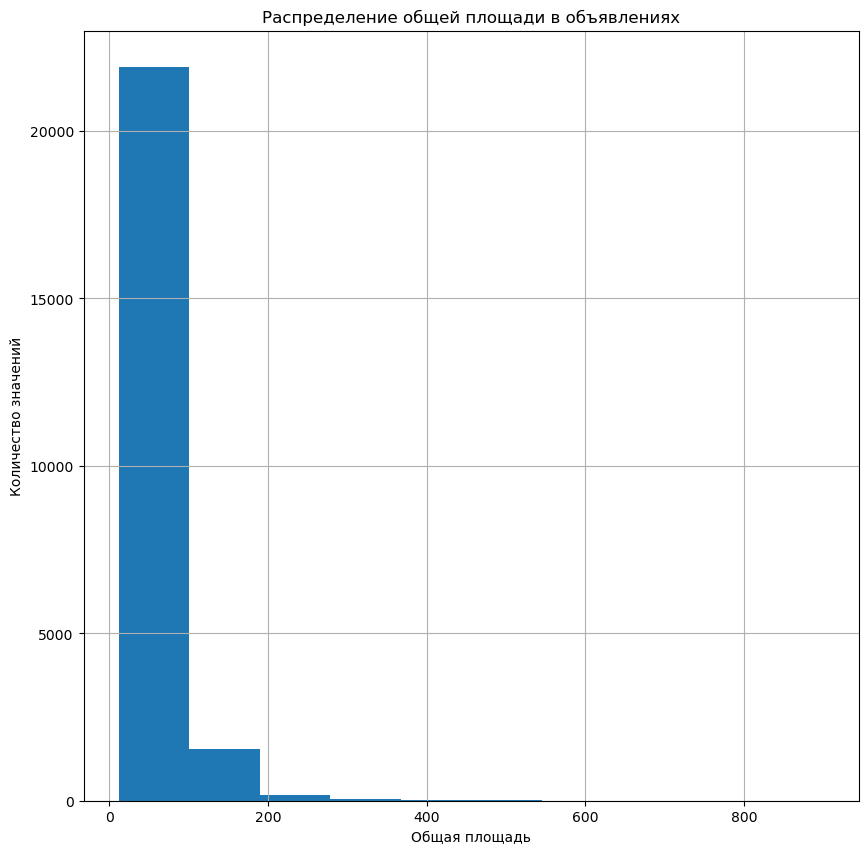

In [26]:

plt.figure(figsize= (10,10))
df.total_area.hist()
plt.title('Распределение общей площади в объявлениях')
plt.ylabel('Количество значений')
plt.xlabel('Общая площадь')
plt.show
df['total_area'].describe().round().astype('int')



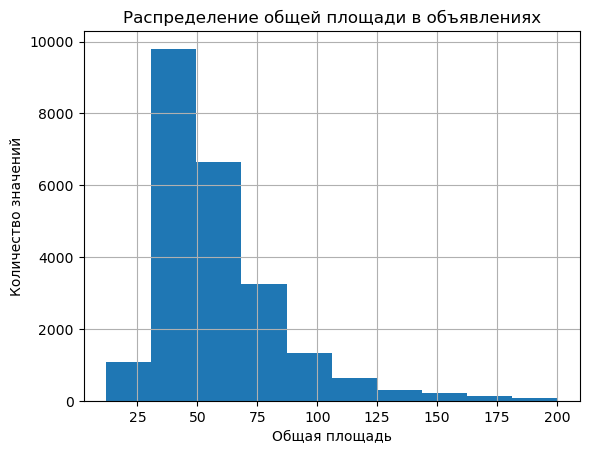

In [27]:
# Отфильтруем квартиры с аномальным значением общей площади. Будем считать квартиры с площадью не более 200 квадратных метров.
df.query('total_area <= 200').total_area.hist()
plt.title('Распределение общей площади в объявлениях')
plt.ylabel('Количество значений')
plt.xlabel('Общая площадь')
plt.show()

In [28]:
 # Посчитаем какой процент данных мы потерям если удалим квартиры плошадью более 200 квадратных метров. Если процент менее 10, то можно спокойно удалить данные.
len(df.query('total_area > 200')) / len(df) * 100 

0.9578463226296469

     Видим, что процент потерянных данных при отбрасывании аномальных значений составил менее 1 процента. Можем удалить аномальные значения. Сохраним в переменной total_area_outliers аномальные значения.

In [29]:
total_area_outliers = df[df['total_area'] > 200].index
df = df.drop(index=total_area_outliers)

count        23472
mean       6026304
std        6237847
min          12190
25%        3400000
50%        4600000
75%        6700000
max      330000000
Name: last_price, dtype: int32

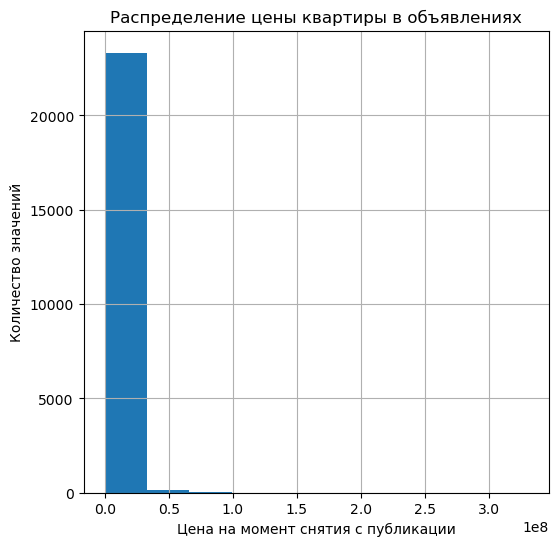

In [30]:
plt.figure(figsize= (6,6))
df.last_price.hist()
plt.title('Распределение цены квартиры в объявлениях')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество значений')
plt.show
df['last_price'].describe().round().astype('int')

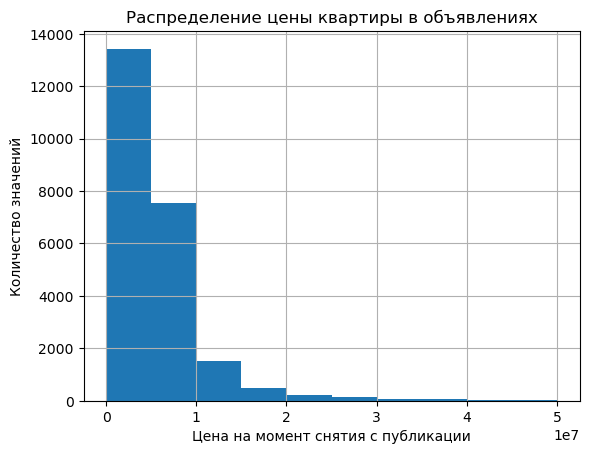

In [31]:
# Отфильтруем квартиры с аномальным значением стоимости квартиры. Будем считать квартиры с ценой не более 50 млн рублей.
df.query('last_price <= 50000000').last_price.hist()
plt.title('Распределение цены квартиры в объявлениях')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество значений')
plt.show()



In [32]:
# Посчитаем какой процент данных мы потерям если удалим квартиры стоимостью более 50 млн рублей. Если процент менее 10, то можно спокойно удалить данные.
len(df.query('last_price > 50000000')) / len(df) * 100


0.21301976823449217

     Видим, что процент аномальных значений квартир с чрезмерно высокой стоимостью составил менее 10 %. Значит можно спокойно удалить эти данные. Сохраним в переменной last_price_outliers аномальные значения.

In [33]:
last_price_outliers = df[df['last_price'] > 50000000].index
df = df.drop(index= last_price_outliers)


count    23422
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         11
Name: rooms, dtype: int32

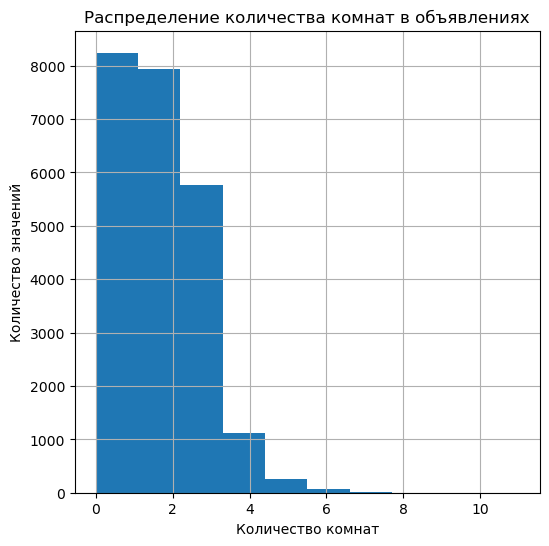

In [34]:

plt.figure(figsize= (6,6))
df.rooms.hist()
plt.title('Распределение количества комнат в объявлениях')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show
df['rooms'].describe().round().astype(int)

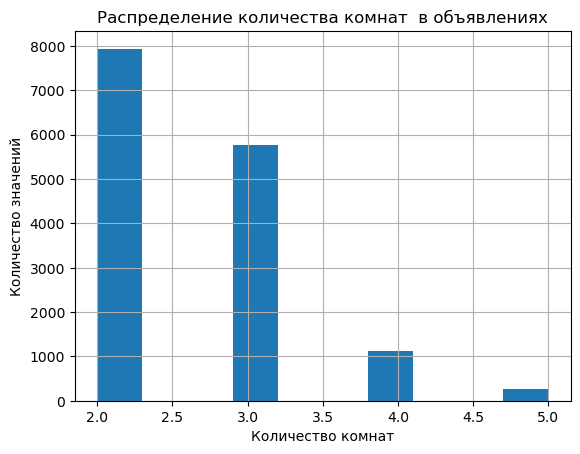

In [35]:
# Отфильтруем квартиры с аномальным значением количества комнат.Рассмотрим  квартиры с  числом комнат от 1 до 6.
df.query('rooms>1 & rooms<6').rooms.hist()
plt.title('Распределение количества комнат  в объявлениях')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()


In [36]:
# Посчитаем какой процент данных мы потерям если удалим квартиры c количеством комнат более 6. Если процент менее 10, то можно спокойно удалить данные.
len(df.query('rooms > 6')) / len(df) * 100 


0.10246776534881737

  Процент аномальных значений меньше 10 и составил 0,1 %. Здесь также можно смело удалить аномальные значения. Сохраним в переменной rooms_outliers отбрасываемые значения.

In [37]:
rooms_outliers = df[df['rooms'] > 6].index
df = df.drop(index = rooms_outliers)


count    14309.000000
mean         2.763085
std          1.266062
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

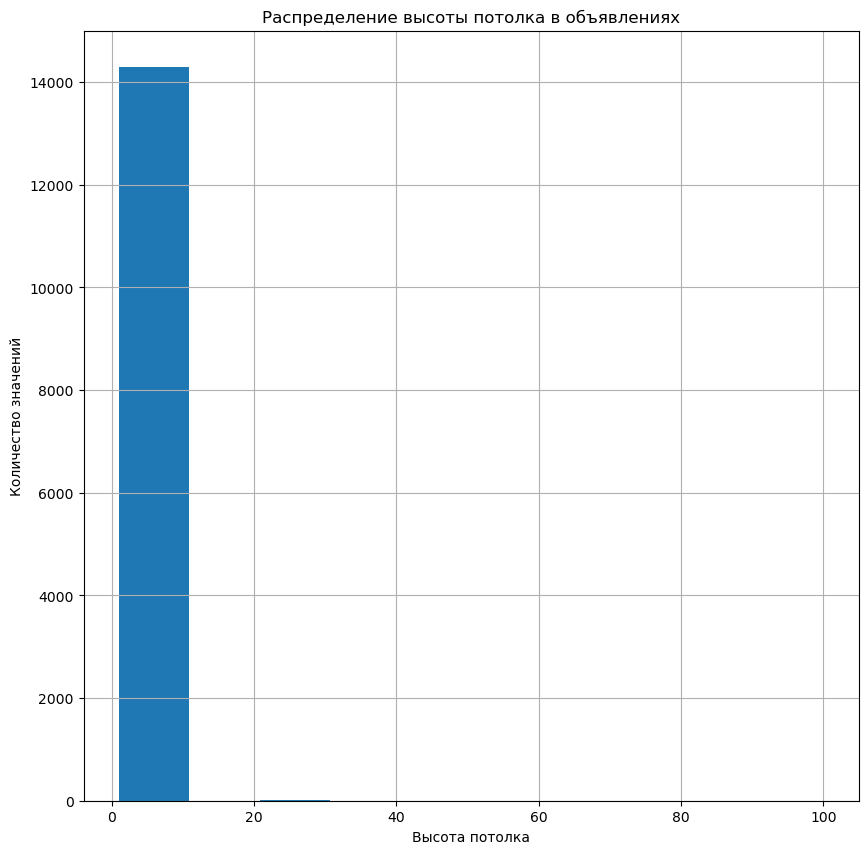

In [38]:
plt.figure(figsize= (10,10))
df.ceiling_height.hist()
plt.title('Распределение высоты потолка в объявлениях')
plt.xlabel('Высота потолка')
plt.ylabel('Количество значений')
plt.show
df['ceiling_height'].describe()

<function matplotlib.pyplot.show(close=None, block=None)>

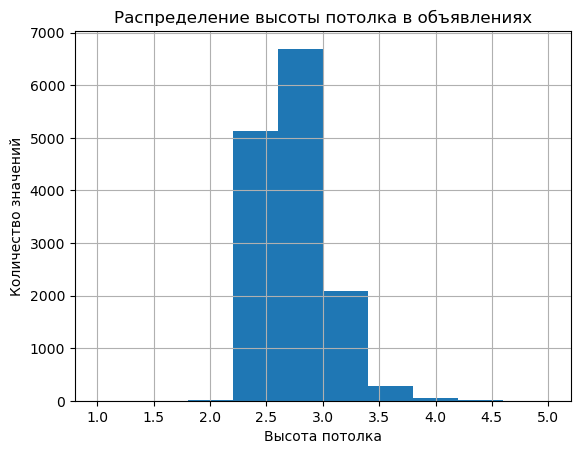

In [39]:
# Отфильтруем квартиры с аномальным значением высоты потолка.Рассмотрим   квартиры с высотой потолка от 0 до 5 м.
df.query('ceiling_height <= 5').ceiling_height.hist()
plt.title('Распределение высоты потолка в объявлениях')
plt.xlabel('Высота потолка')
plt.ylabel('Количество значений')
plt.show


In [40]:
# Посчитаем какой процент данных мы потерям если удалим квартиры с высотой полтолка более 5 м. Если процент менее 10, то можно спокойно удалить данные.
len(df.query('ceiling_height > 5')) / len(df) * 100 

0.13676382596803147

      Видим, что процент аномальных значений по высоте потолка составил 0,14 %. Можем смело удалять эти данные, так как они не будут влиять на дальнейшие расчеты. Сохраним в переменной ceiling_height_outliers значения, которые собираемся удалить. 
      

In [41]:
ceiling_height_outliers = df[df['ceiling_height'] > 5].index

df = df.drop(index=ceiling_height_outliers)

Общие выводы: 
1) Общая площадь нашей выборки варьируется от 12 до 900 квадратных метров. Среднее значение составляет 60 м^2. Медиана составляет 52 квадратных метра. Описывая гистограмму можно сказать, что она не имеет вид нормального распределения, так как наиболее частые значения расположены слева возле 0.

2) Цена объекта недвижимости варьируется от 12190 рублей до 763 млн рублей. Среднее значение составляет 6,5 млн рублей. Медиана составляет 4,6 млн рублей. Описывая гистограмму можно сказать, что она не имеет вид нормального распределения, так как наиболее частые значения расположены слева. 

3) Минимальное количество комнат - 1. Максимальное количество комнат = 19. Среднее значение совпадает с медианой и равняется 2. 

4) Высота потолка в среднем равна 2,77 м. Медиана немного меньше и составила 2,65 м. 

5) По некоторым параметрам были выявлены аномальные значения, которые можно удалить и отбросить. При этом удаление данных не повлияет на дальнейшие расчеты. 


   ## 11  4.2   Построим гистограмму для следующих параметров: living_area, kitchen_area, floor, floors_total.  


Применим метод describe() к каждому параметру, чтобы узнать краткую статистическую сводку для данных. Округлим значения с помощью метода round() и приведем к целочисленному типу с помощью метода astype(int).


count    21498
mean        33
std         17
min          2
25%         18
50%         30
75%         42
max        165
Name: living_area, dtype: int32

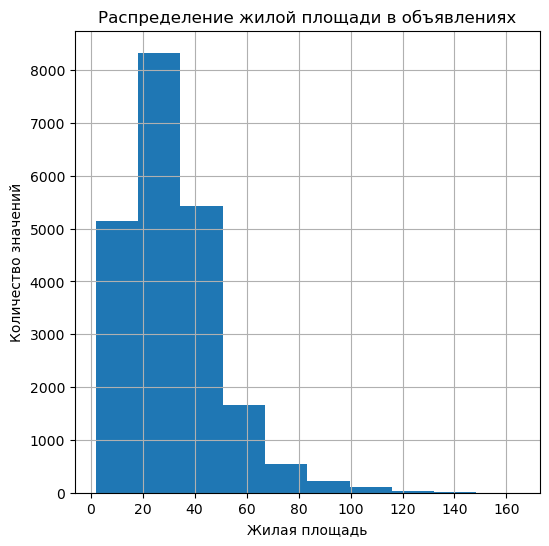

In [42]:
plt.figure(figsize= (6,6))
df.living_area.hist()
plt.title('Распределение жилой площади в объявлениях')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество значений')
plt.show
df['living_area'].describe().round().astype(int)

 На графике видим, что в большинстве объявлений жилая площадь около 30-40 кв.м.

count    21131
mean        10
std          5
min          1
25%          7
50%          9
75%         12
max         75
Name: kitchen_area, dtype: int32

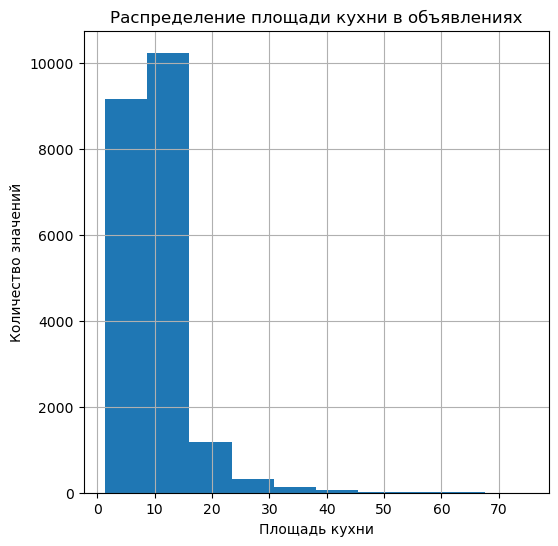

In [43]:

plt.figure(figsize= (6,6))
df.kitchen_area.hist()
plt.title('Распределение площади кухни в объявлениях')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество значений')
plt.show
df['kitchen_area'].describe().round().astype(int) 

На графике видно что в большинстве объявлений площадь кухни равна в среднем 10-11 кв.м.

count    23366
mean         6
std          5
min          1
25%          2
50%          4
75%          8
max         33
Name: floor, dtype: int32

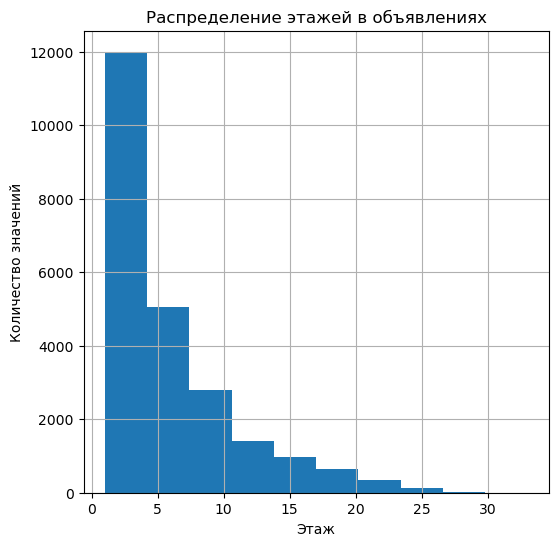

In [44]:

plt.figure(figsize= (6,6))
df.floor.hist()
plt.title('Распределение этажей в объявлениях')
plt.xlabel('Этаж')
plt.ylabel('Количество значений')
plt.show
df['floor'].describe().round().astype(int)

На графике видим, что в большинстве объявлений о продаже квартиры указывают первые 5 этажей.

   Общие выводы: 
   
     1) Жилая площадь нашей выборки варьируется от 2 до 410 квадратных метров. Среднее значение = 34 кв.м. Медиана(второй квартиль) равняется 30. 
     
     2) Площадь кухни варьируется от 1 до 112 кв.м. Среднее значение составляет 11 кв.м. Второй квартиль(медиана) - 9 кв.м. Стандартное отклонение = 7.
     
     3)  В среднем этажом нашей выборки является 6-й. Медиана является 4- м этажом. Минимальный этаж-1. Максимальный - 33.
 

   ## 12  4.3  Построим гистограмму для следующих параметров: cityCenters_nearest, airports_nearest, parks_nearest.  
     
   Применим метод describe() к каждому параметру, чтобы узнать краткую статистическую сводку для данных. Округлим значения  с помощью метода round() и приведем к целочисленному типу с помощью метода astype(int)

count    17862
mean     14322
std       8586
min        181
25%       9496
50%      13174
75%      16361
max      65968
Name: cityCenters_nearest, dtype: Int64

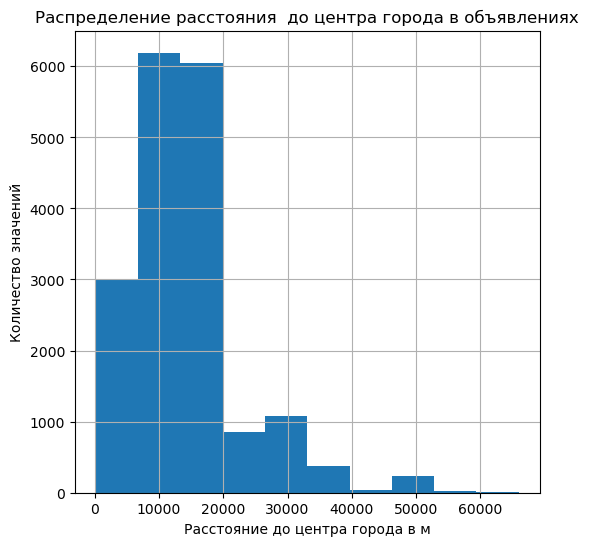

In [45]:

plt.figure(figsize= (6,6))
df.cityCenters_nearest.hist()
plt.title('Распределение расстояния  до центра города в объявлениях')
plt.xlabel('Расстояние до центра города в м')
plt.ylabel('Количество значений')
plt.show
df['cityCenters_nearest'].describe().round().astype('Int64')

 На графике видим что в среднем расстояние недвижимости до центра города составляет 14191 м.


count    17842
mean     28836
std      12698
min          0
25%      18495
50%      26817
75%      37407
max      84869
Name: airports_nearest, dtype: int32

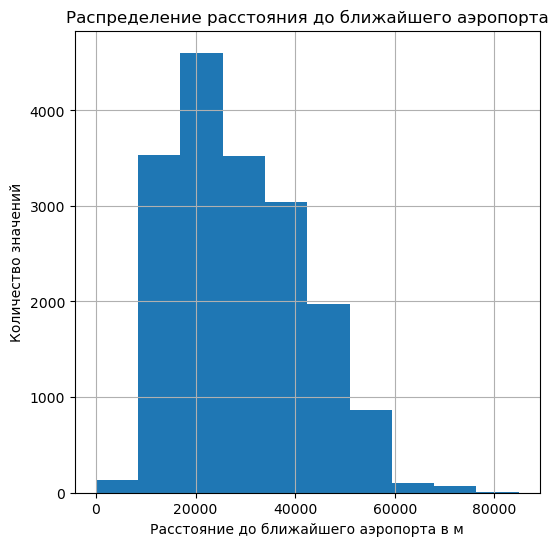

In [46]:

plt.figure(figsize= (6,6))
df.airports_nearest.hist()
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта в м')
plt.ylabel('Количество значений')
plt.show
df['airports_nearest'].describe().round().astype(int)

  По данным графика, можно заметить что среднее расстояние до ближайшего аэропорта составляет 28836 м.

count    7856
mean      493
std       343
min         1
25%       288
50%       456
75%       614
max      3190
Name: parks_nearest, dtype: Int64

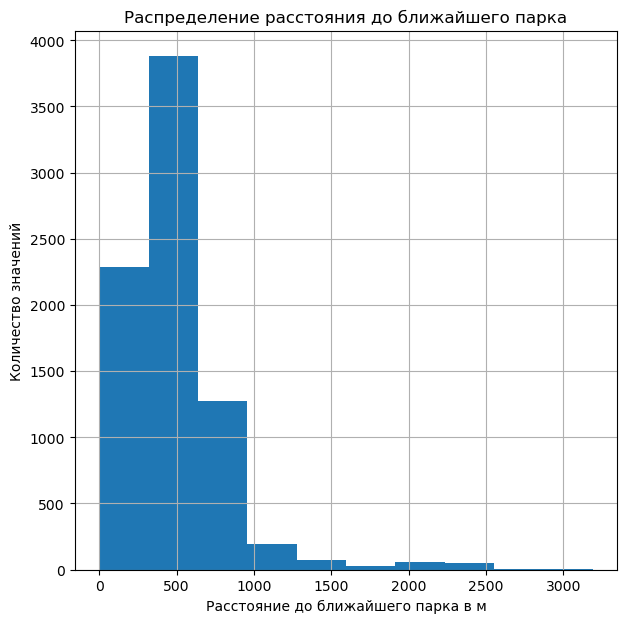

In [47]:

plt.figure(figsize= (7, 7))
df.parks_nearest.hist()
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка в м')
plt.ylabel('Количество значений')
plt.show
df['parks_nearest'].describe().round().astype('Int64')

По графику видим, что в объявлениях среднее значение расстояния до ближайшего парка составило 500 м.

count      23366
unique         3
top       другой
freq       17148
Name: floor_type, dtype: object

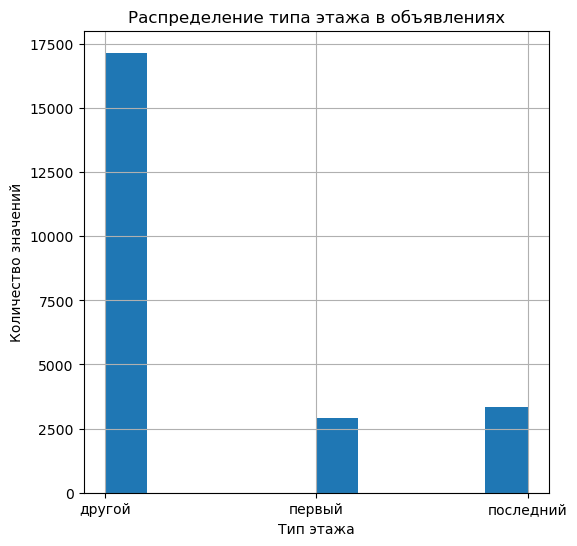

In [48]:
plt.figure(figsize= (6,6))
df.floor_type.hist() 
plt.title('Распределение типа этажа в объявлениях')
plt.xlabel('Тип этажа')
plt.ylabel('Количество значений')
plt.show
df['floor_type'].describe()

 По данным графика видно что в большинстве объявлений указывают другой тип этажа, отличный от первого и последнего.

count    23366
mean         3
std          2
min          0
25%          1
50%          3
75%          4
max          6
Name: first_exposition_day_of_week, dtype: Int64

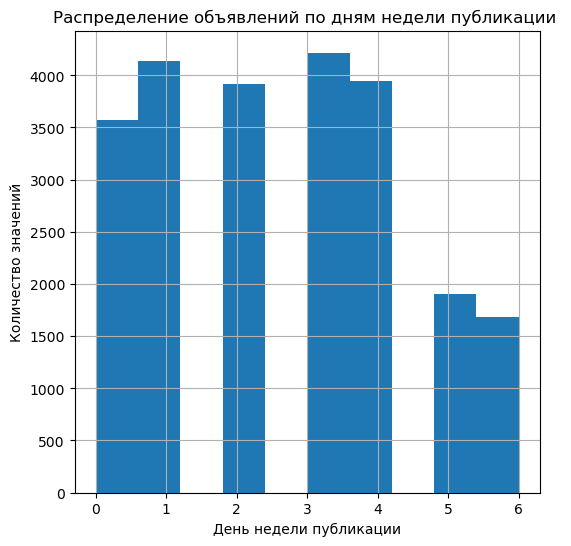

In [49]:
 
plt.figure(figsize= (6,6))
df.first_exposition_day_of_week.hist()
plt.title('Распределение объявлений по дням недели публикации ')
plt.xlabel('День недели публикации')
plt.ylabel('Количество значений')
plt.show
df['first_exposition_day_of_week'].describe().round().astype('Int64')

      По нашему графику, видим что большинство объявлений публикуется в четверг, можно заметить равномерное распределение публикаций объявлений с понедельника по пятницу.

count    23366
mean         6
std          3
min          1
25%          3
50%          6
75%         10
max         12
Name: first_exposition_month, dtype: Int64

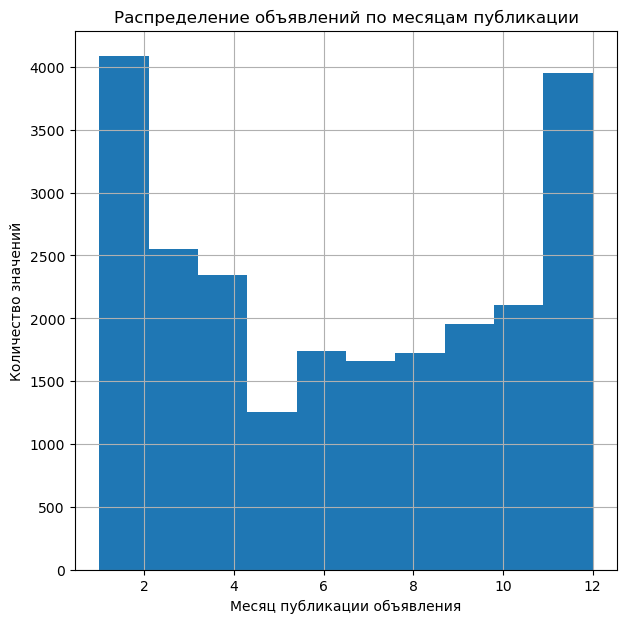

In [50]:

plt.figure(figsize = (7,7))
df.first_exposition_month.hist()
plt.title('Распределение объявлений по месяцам публикации')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество значений')
plt.show
df['first_exposition_month'].describe().round().astype('Int64')

Согласно данным графика, больше всего публикуется объявлений в декабре и январе.

         Общие выводы:  
      
  1) Согласно графику гистограммы,  среднее расстояние квартиры до центра города составляет 14191 м(14 км). Минимальное значение равно 181 м. Максимальное значение равно 66 км. Медиана равна 13098 м (13 км)
  
  2) Расстояние до ближайшего аэропорта по данным графика варьируется от 0 до 84 км. Среднее расстояние равно 28794 м или 28,794 км. Медиана немного меньше среднего значения и составляет 26726 м(26,726 км) 
  
  3) В среднем расстояние до ближайшего парка составляет 491 м. Медиана(второй квартиль) равен 455 м. Максимальное значение расстояния равно 3190 м(3 км)
  
  4) Больше всего объявлений о продаже среди тех квартир, которые находятся между 1 и последним этажом, т.е. относятся к другому типу этажей
  
  5) Наблюдается примерно равное распределение опубликованных объявлений по будним дням(с понедельника по пятницу), в субботу и воскресенье заметно меньшее число опубликованных объявлений
  
  6) Лидерами по количеству опубликованных объявлений являются два зимних месяца: декабрь и январь
  

   ##  13 4.4  Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем также сколько обычно занимает продажа. Ответим на вопрос: "Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?".
     

<function matplotlib.pyplot.show(close=None, block=None)>

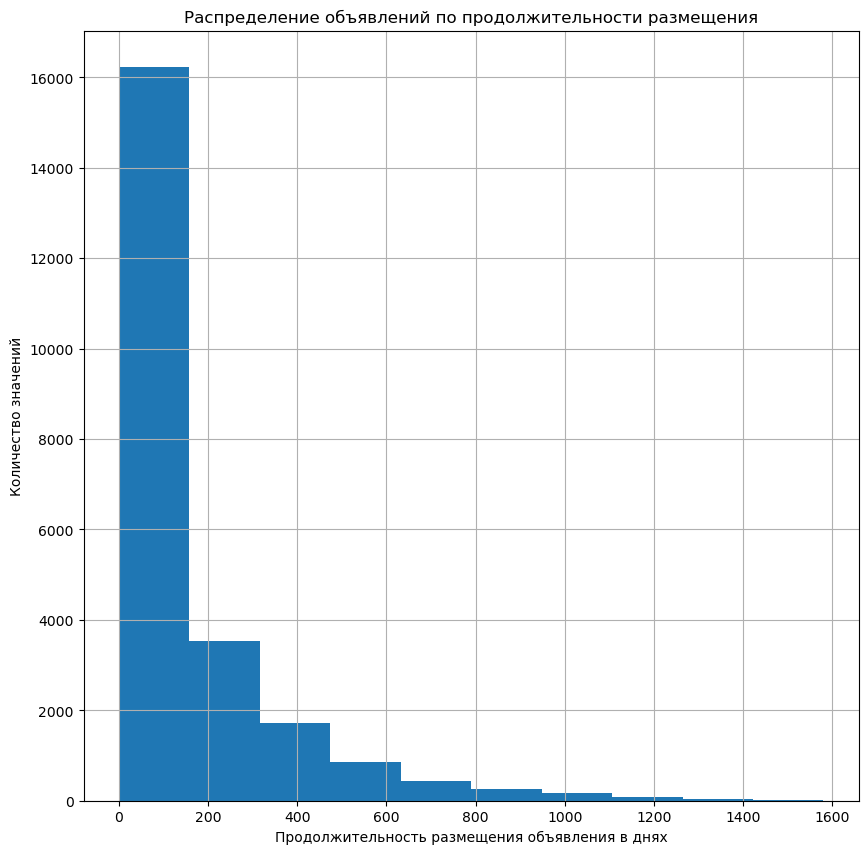

In [51]:

plt.figure(figsize = (10,10))
df.days_exposition.hist() 
plt.title('Распределение объявлений по продолжительности размещения')
plt.xlabel('Продолжительность размещения объявления в днях')
plt.ylabel('Количество значений')
plt.show

count    23366
mean       156
std        212
min          0
25%         23
50%         73
75%        197
max       1580
Name: days_exposition, dtype: Int64


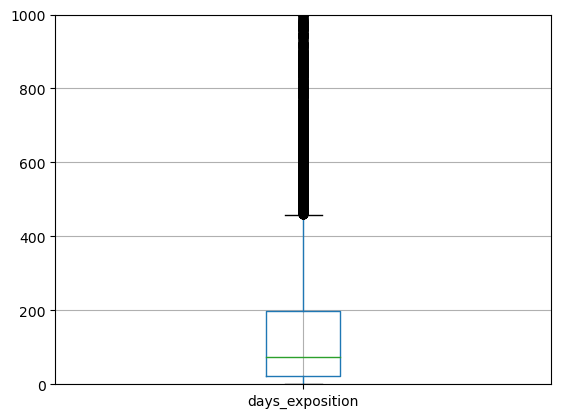

In [52]:
# Построим диаграмму 'ящик с усами' для столбца датафрейма.
df.boxplot(column='days_exposition')
plt.show
plt.ylim(0,1000)
print(df['days_exposition'].describe().round().astype('Int64')) 

     Видим, что нижний "ус" упирается в ноль, верхний "ус" равен примерно 500 дням. Это граница нормального размаха. Все, что лежит выше 500 дней считается выбросом.

In [53]:
 # Применим метод value_counts к столбцу датафрейма и определим уникальные значения столбца и их количество
df['days_exposition'].value_counts()

0       3100
45       879
60       538
7        232
30       206
        ... 
1553       1
793        1
1434       1
1231       1
971        1
Name: days_exposition, Length: 1133, dtype: int64

     Видим, что в нашем датафрейме есть уникальные значения.  Это 45, 60, 7, 30 дней. На этих сроках в гистограмме возникают пики, поэтому можно сказать что самыми популярными сроками продажи квартиры являются неделя. месяц, два месяца и 45 дней(полтора месяца). Могу предположить, что первые два месяца самые важные и популярные при публикации объявления и продажи квартиры. Часто некоторые продавцы используют платные фильтры для продвижения своего объявления среди списка других объявлений. Зачастую это даёт результат и продавец находит своего покупателя. 

In [54]:
# Посчитаем среднее значение для столбца days_exposition
df['days_exposition'].mean().round().astype('int')

156

In [55]:
# Посчитаем медиану для столбца days_exposition
df['days_exposition'].median()

73.0

     Построим новую гистограмму по диапазону минимальных значений.Посмотрим на каком сроке происходит первый скачок по количеству и оперделим быстрые продажи.

<Axes: >

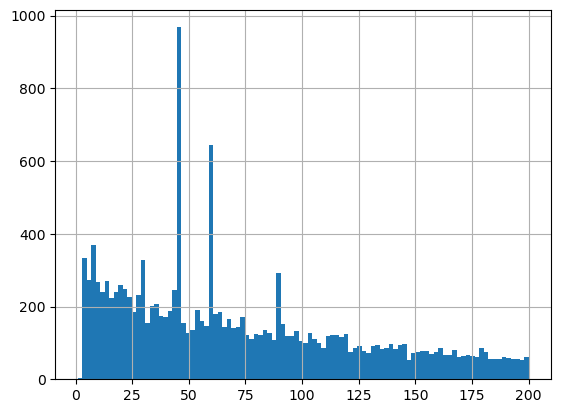

In [56]:
df.days_exposition.hist(bins = 100, range=(1,200))

     По графику видим, что первый ощутимый скачок по количеству объявлений наблюдается в районе 45- 50 дней. Таким образом продажи, сделанные менее чем за 45 дней, можно назвать быстрыми. 

     По итогам исследовательского анализа данных построили диграмму размаха и гистограмму для столбца days_exposition. Определили,что есть уникальные значения, встречающиеся наиболее часто в столбце days_exposition. Это 7,30,45, 60 дней. Сделали предположение, почему на гистограмме возникают такие пики. Определили границу нормального размаха- от 0 до 500 дней. Все, что находится выше 500 дней, можем считать выбросами и необоснованно долгими продажами. 45 дней - это срок самой быстрой продажи. Посчитали среднее значение и медиану.  
     Были выделены и отфильтрованы из анализа квартиры с аномальными параметрами(высота потолка, количество комнат, площадь, слишком большая стоимость), вследствие чего была повышена точность и достоверность нашего исследования. 
     

 ## 14 4.5 Изучим зависимость цены от следующих параметров:общей площади;жилой площади;площади кухни;количества комнат;этажа, на котором расположена квартира (первый, последний, другой);даты размещения (день недели, месяц, год)

Построим графики, которые покажут зависимость цены от указанных выше параметров. Ответим на вопрос: Какие факторы больше всего  влияют на общую (полную) стоимость объекта?

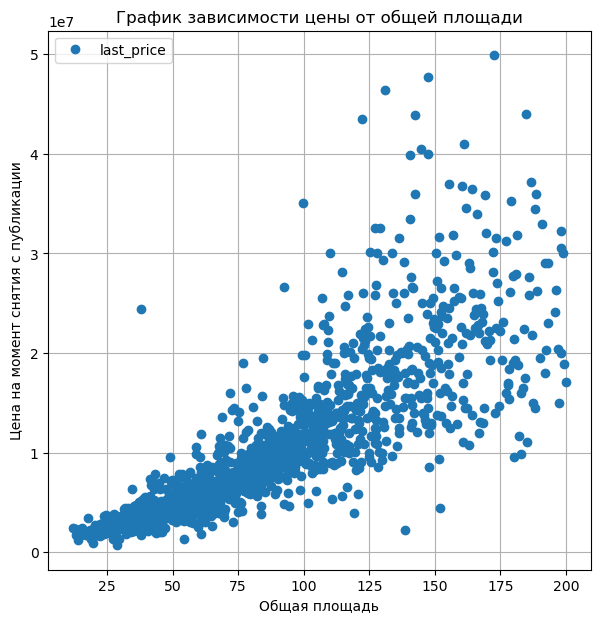

0.7633192808954032

In [57]:
# Построим матрицу рассеяния для пар total_area и  last_price
# Применим метод query для столбца total_area. По умолчанию будем считать, что общая площадь не больше 200 кв.метров.
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(7, 7), title ='График зависимости цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена на момент снятия с публикации') 
plt.show()


# Определим коэффициент корреляции Пирсона между парой total_area и last_price
df['total_area'].corr(df['last_price'])


      Коэффициент корреляции Пирсона положительный и составляет 0, 76. Воспользуемся шкалой Чеддока и установим, что связь между общей площадью и ценой на момент снятия с публикации является заметной. Таким образом, с увеличением общей площади увеличивается и цена. 

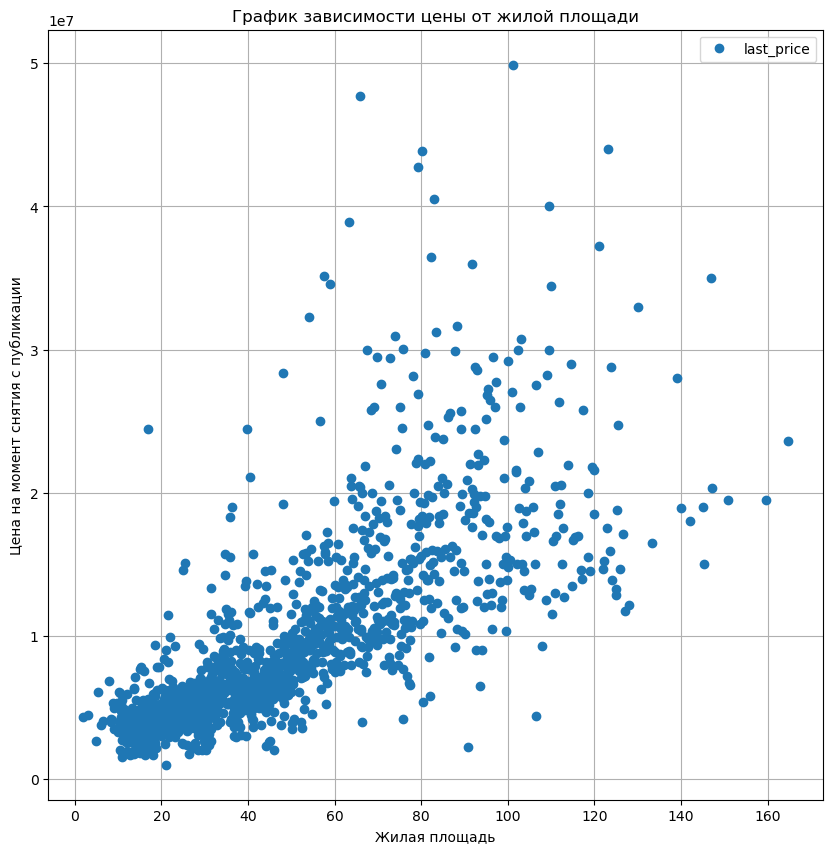

0.6479120069116766

In [58]:
# Построим матрицу рассеяния для пар 'last_price' и 'living_area'
df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10), title='График зависимости цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена на момент снятия с публикации') 
plt.show()
# Определим коэффициент корреляции Пирсона между парой  living_area и last_price
df['last_price'].corr(df['living_area'])

        Коэффициент корреляции Пирсона положительный и составляет 0,64.  По шкале Чеддока определяем, что связь между жилой площадью и ценой является заметной. С увеличением жилой площади увеличивается и цена на момент снятия с публикации. 

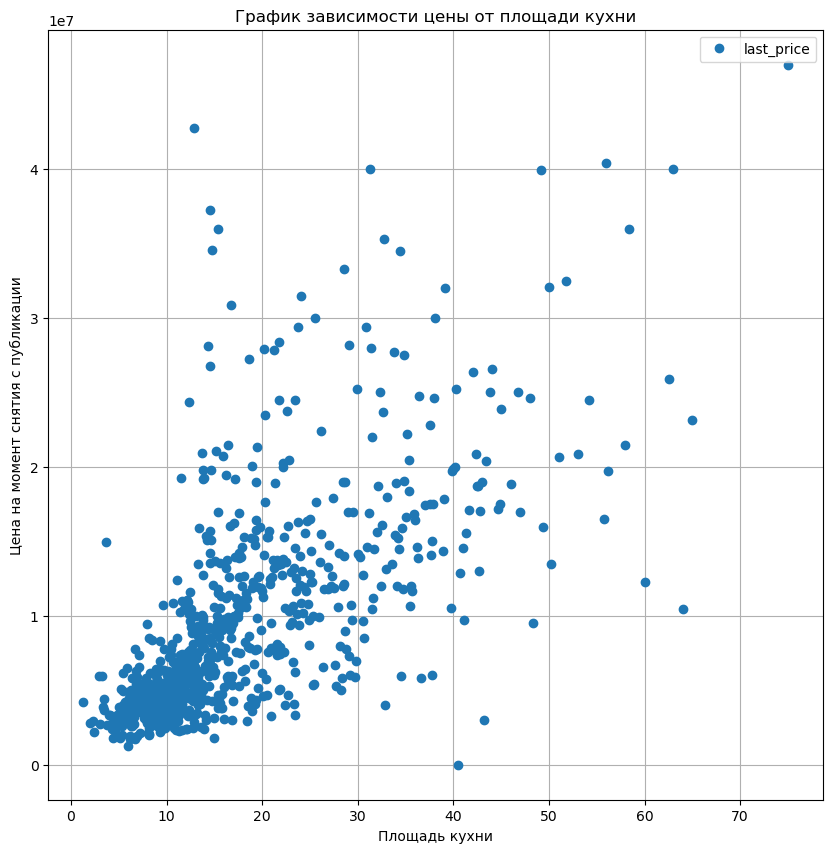

0.5888425089909279

In [59]:
# Построим матрицу рассеяния для пар 'last_price' и 'kitchen_area'
df.pivot_table(index='kitchen_area', values = 'last_price').plot(grid=True, style='o',figsize=(10,10), title='График зависимости цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
# Определим коэффициент корреляции Пирсона между парой  kitchen_area и last_price
df['last_price'].corr(df['kitchen_area'])

     Коэффициент корреляции Пирсона составил 0,59. По шкале Чеддока наблюдается положительная заметная связь между площадью кухни и ценой. 

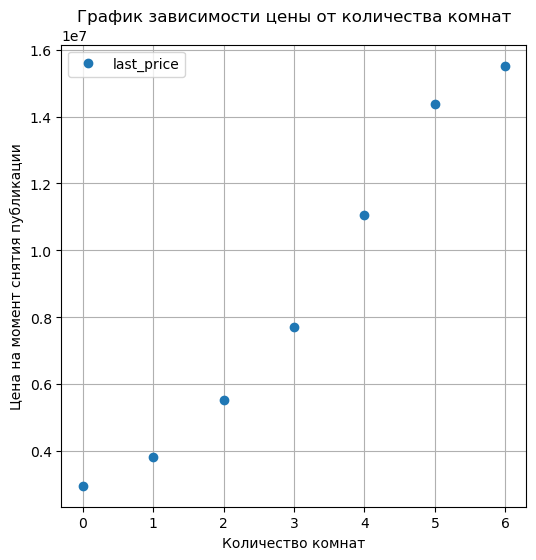

0.4633631395896637

In [60]:
# Построим матрицу рассеяния для пар 'last_price' и 'rooms'
# Воспользуемся методом df.query() и уберем аномальные значения для rooms. По умолчанию будем учитывать квартиры с числом комнат не более 6.
df.pivot_table(index= 'rooms', values='last_price').plot(grid=True, style='o',figsize=(6, 6), title = 'График зависимости цены от количества комнат')
plt.ylabel('Цена на момент снятия публикации')
plt.xlabel('Количество комнат') 
plt.show()
# Определим коэффициент корреляции Пирсона между парой  rooms и last_price
df['last_price'].corr(df['rooms'])

    Коэффициент корреляции Пирсона равен 0.46. Связь между количеством комнат и ценой умеренная. 

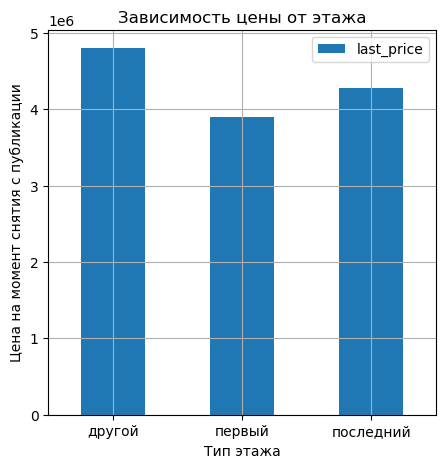

In [61]:
# Построим матрицу рассеяния для пары floor_type и last_price
import matplotlib.pyplot as plp 
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, kind='bar', figsize=(5, 5), title='Зависимость цены от этажа')
plt.xlabel('Тип этажа')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()


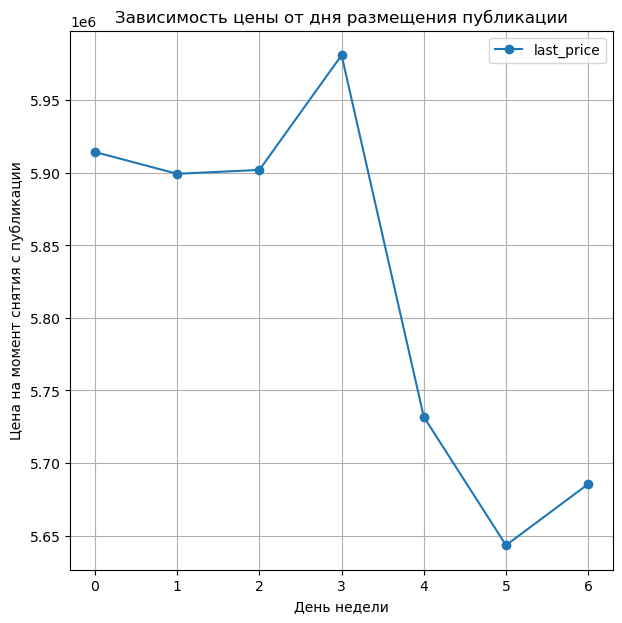

In [62]:
# Определим зависимость цены от дня размещения.
df.pivot_table(index='first_exposition_day_of_week', values = 'last_price').plot(grid=True,style='o-',figsize=(7, 7), title='Зависимость цены от дня размещения публикации')
plt.xlabel('День недели')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()



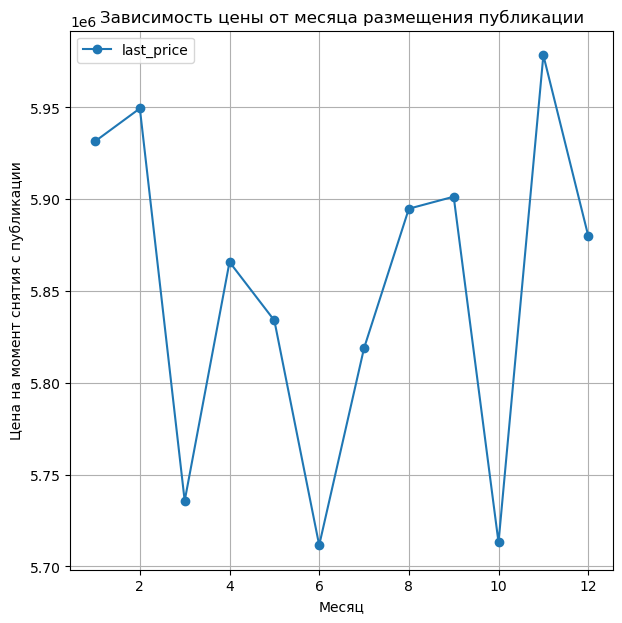

In [63]:
# Определим зависимость цены от месяца размещения объявления
df.pivot_table(index='first_exposition_month', values = 'last_price').plot(grid=True, style='o-', figsize=(7, 7), title = 'Зависимость цены от месяца размещения публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()


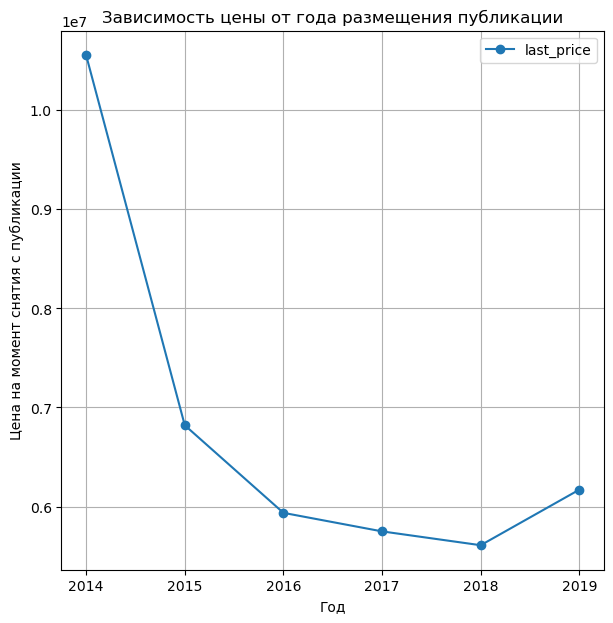

In [64]:
# Определим зависимость цены от года размещения объявления
df.pivot_table(index='first_exposition_year', values = 'last_price').plot(grid=True, style='o-', figsize=(7, 7), title = 'Зависимость цены от года размещения публикации')
plt.xlabel('Год')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()



   Вывод:
   Зависимость цены от дня, месяца, года размещения: 
   1. Самыми дорогими квартирами являются те, объявления о которых были опубликованы в субботу. Дешевле всего квартиры, котоыре были опубликованы в воскресенье.
   2. Дороже всего те квартиры, которые продаются с декабря.  Дешевле всего - с октября.
   3. Пик по дороговизне квартир пришелся на 2014 год, после чего видно падение цены продажи недвижимости с каждым годом до 2018  года. Предполагаю, что это связано с последующим кризисом после 2014 года и уменьшением покупательской способности населения. После 2018 года наметился подъем экономики и увеличения реальных доходов населения, что сказалось и на продаже недвижимости. 

   ## 15 4.6  Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
       


In [65]:
# Определим среднюю стоимость квадратного метрра среди  топ-10 населённых пунктов с наибольшим числом объявлений.
df_top_10 = df.pivot_table(index='locality_name', values = 'first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition',ascending=False).head(10)

df_top_10.columns = ['Число объявлений']
df_top_10

,Число объявлений
locality_name,
Санкт-Петербург,15414
посёлок Мурино,554
посёлок Шушары,440
Всеволожск,398
Пушкин,364
Колпино,337
посёлок Парголово,326
Гатчина,306
деревня Кудрово,299


 Посчитаем среднюю цену 1 квадратного метра в этих населённых пунктах. Выделим  населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [66]:
# Определим среднюю стоимость квадратного метра в топ-10 населённых пунктах по числу объявлений. Округлим получившиеся значения и приведем к типу int.
df_top_10 = df['locality_name'].value_counts().head(10)


df_top_10_avg_price_per_area = df.query('locality_name in (@df_top_10.index)').pivot_table(values='price_per_area', index='locality_name')
df_top_10_avg_price_per_area.round().astype('Int64').sort_values(by ='price_per_area', ascending=True)


,price_per_area
locality_name,
Выборг,58141
Всеволожск,68654
Гатчина,68757
Колпино,75333
посёлок Шушары,78677
посёлок Мурино,85656
посёлок Парголово,90332
деревня Кудрово,92473
Пушкин,103122


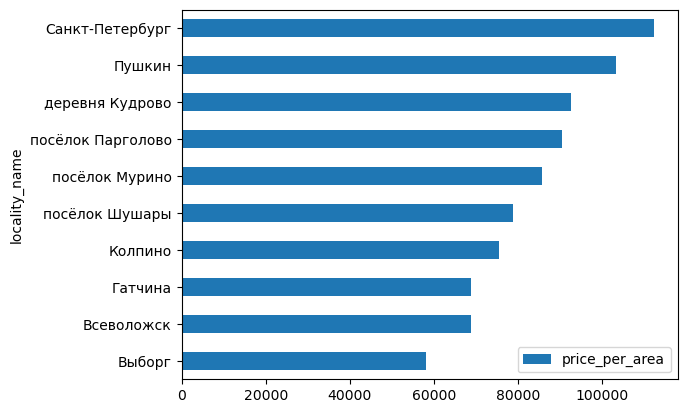

In [67]:
   # Для визуализации результатов построим столбчатый график используя метод plot(kind='barh').
df_top_10_avg_price_per_area.round().astype('Int64').sort_values(by ='price_per_area', ascending=True).plot(kind = 'barh') 
plt.show()

    Вывод: 
    
    На первом месте по количеству объявлений находится Санкт-Петербург, остальные населенные пункты расположились с примерно равным числом объявлений. На первом месте по средней стоимости 1 квадратного метра находится также Санкт_Петербург. На втором месте город Пушкин. На последнем месте с самой низкой стоимостью квадратного метра расположился Выборг.

 ##  16 4.7 Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города. Определим границу центральной зоны.

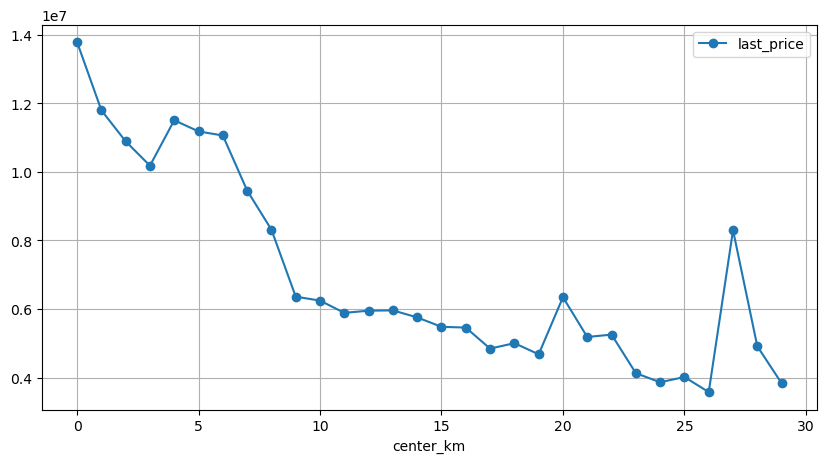

In [68]:
df['center_km'] = df['cityCenters_nearest'] / 1000
df['center_km'] = df['center_km'].fillna(0).astype('int')

df.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-',figsize=(10, 5))

plt.show()


    Центральная зона - это 6 км и меньше. Дальше 6 км средняя стоимость квартиры резко уменьшается.
    По данным графика, можно сделать вывод, что чем дальше находится квартира от центра Санкт-Петербурга, тем она становится дешевле для покупки.

                ceiling_height  last_price     rooms  total_area
ceiling_height        1.000000    0.868867  0.435670    0.811815
last_price            0.868867    1.000000  0.524687    0.904767
rooms                 0.435670    0.524687  1.000000    0.618053
total_area            0.811815    0.904767  0.618053    1.000000


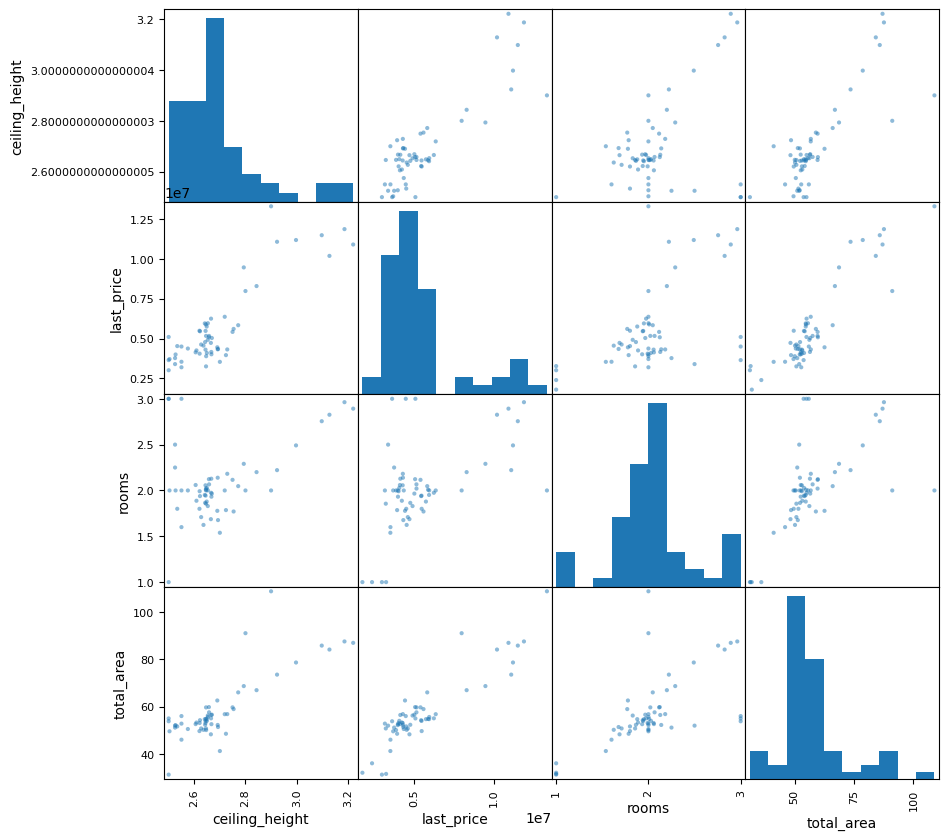

In [69]:
df_spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 6)')

# С помощью матрицы диаграммы рассеяния построим гистограмму для df_spb_center для total_area, last_price, rooms, ceiling_height.
df_spb_center = df.pivot_table(index='center_km', values =['total_area','last_price', 'rooms', 'ceiling_height'])
print(df_spb_center.corr())
pd.plotting.scatter_matrix(df_spb_center, figsize=(10, 10))
plt.show()

    Построим по df_spb_center диаграмму рассеяния для пар:(last_price, total_area),(last_price, rooms), (last_price, cityCenter_nearest), (last_price, first_exposition_day-of-week),(last_price, first_exposition_month),(last_price, first_exposition_year).
    

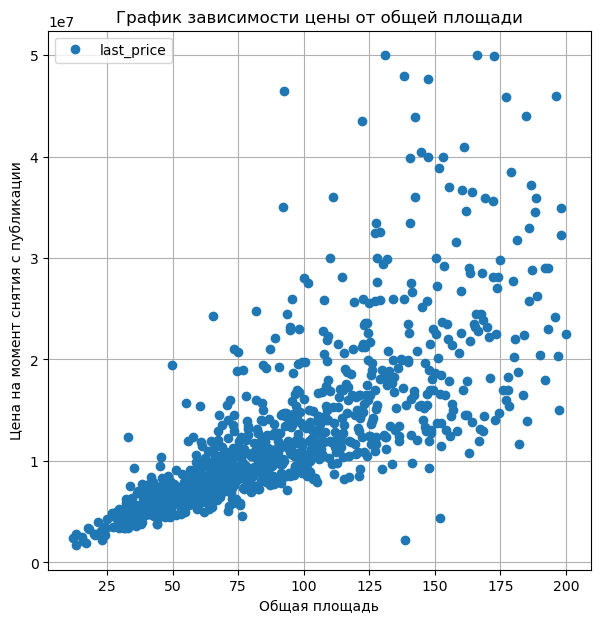

0.6750119205129457

In [70]:
# Зависимость цены от общей площади
df_spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 6)')
df_spb_center.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(7, 7), title ='График зависимости цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена на момент снятия с публикации') 
plt.show()


# Определим коэффициент корреляции Пирсона между парой total_area и last_price
df_spb_center['total_area'].corr(df_spb_center['last_price'])

Коэффициент корреляции Пирсона составил 0.68. Связь между общей площадью и ценой заметная. 

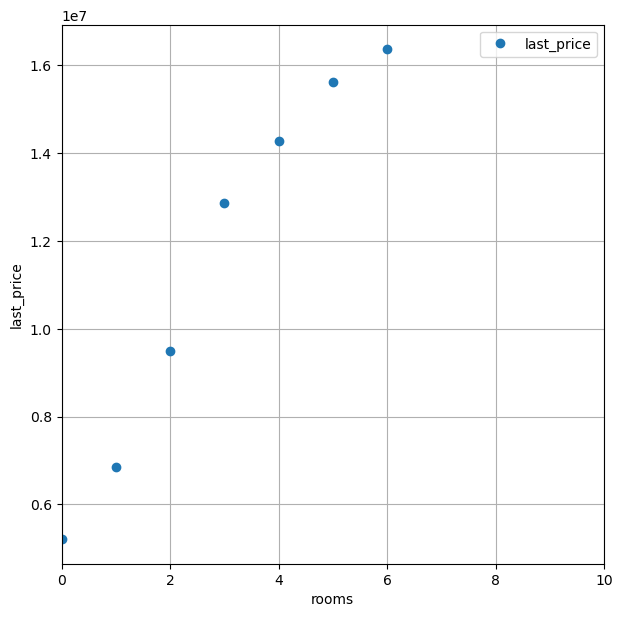

0.35435095220772583

In [71]:

df_spb_center.pivot_table(index='rooms', values='last_price').plot(grid=True,style='o',xlim=(0,10),figsize=(7, 7))
plt.xlabel('rooms')
plt.ylabel('last_price')
plt.show()

df_spb_center['rooms'].corr(df_spb_center['last_price'])

По данным графика, видим что коэффициент корреляции Пирсона составил 0.35. Связь между количеством комнат и ценой умеренная.

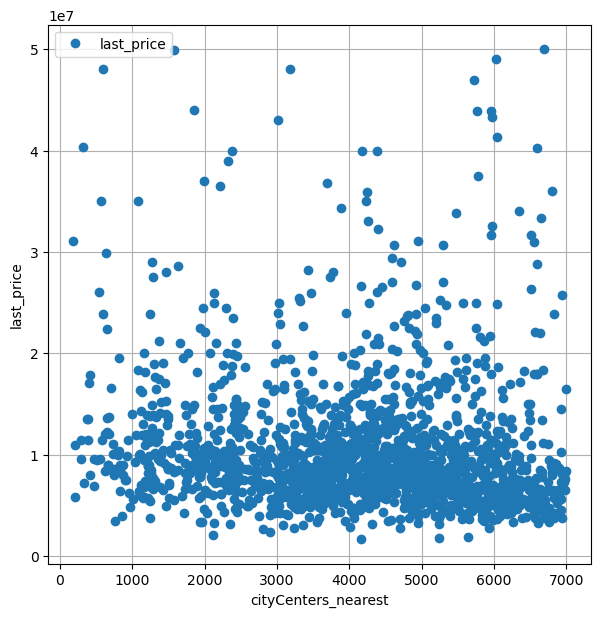

-0.019332309676482425

In [72]:
df_spb_center.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True,style='o',figsize=(7, 7))
plt.xlabel('cityCenters_nearest')
plt.ylabel('last_price')
plt.show()

df_spb_center['cityCenters_nearest'].corr(df_spb_center['last_price'])


Видим по графику, что фактически  нет какой-либо связи  между расстоянием до центра города и ценой. 

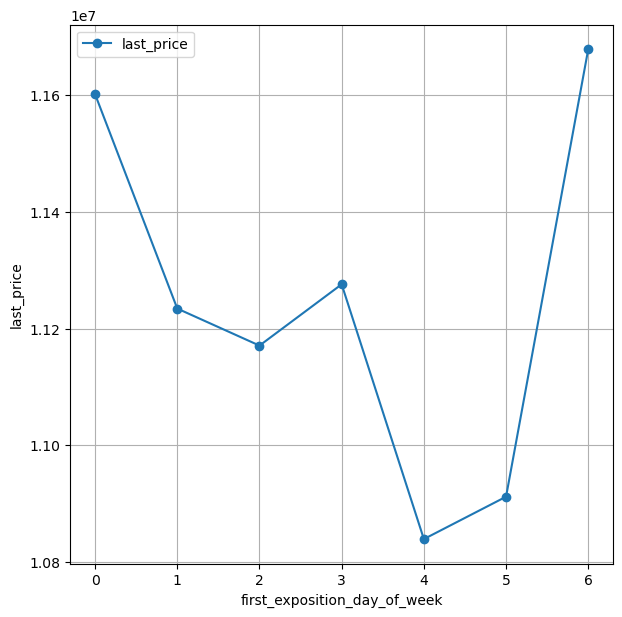

In [73]:
df_spb_center.pivot_table(index='first_exposition_day_of_week', values='last_price').plot(grid=True,style='o-',figsize=(7, 7))
plt.xlabel('first_exposition_day_of_week')
plt.ylabel('last_price')
plt.show()


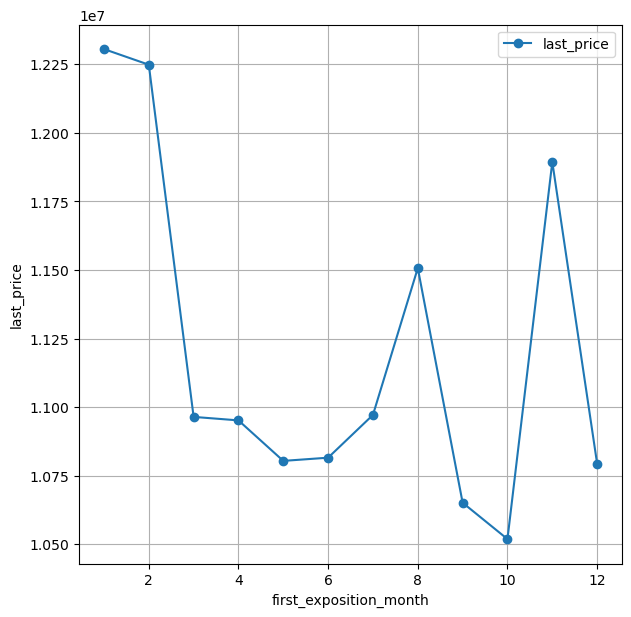

In [74]:

df_spb_center.pivot_table(index='first_exposition_month', values='last_price').plot(grid=True,style='o-',figsize=(7, 7))
plt.xlabel('first_exposition_month')
plt.ylabel('last_price')
plt.show()

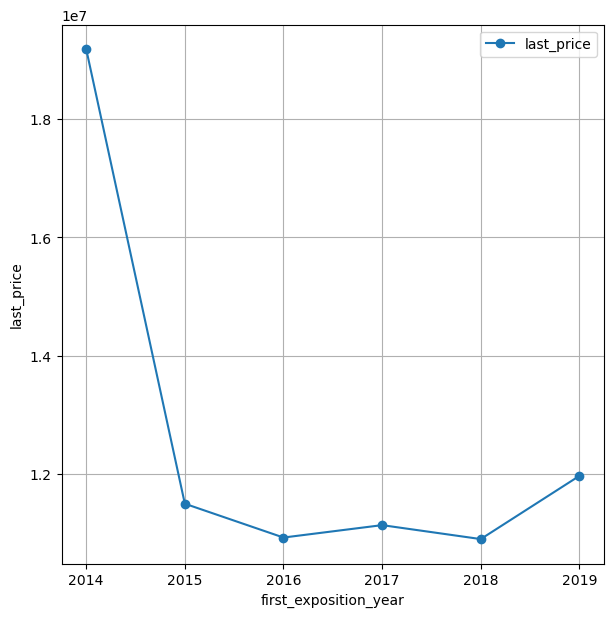

In [75]:
df_spb_center.pivot_table(index='first_exposition_year', values='last_price').plot(grid=True,style='o-',figsize=(7, 7))
plt.xlabel('first_exposition_year')
plt.ylabel('last_price')
plt.show()

    Выводы: 
1) Зависимость цены от общей площади в центре Санкт-Петербурга в целом такая же как и по всей выборке.

2) В центре Санкт-Петербурга наблюдается умеренная зависимость цены квартиры и количества комнат.
   Нельзя уверенно сказать, что с увеличением комнат увеличивается и цена на квартиру.
   
3) Цена квартиры фактически никаким образом не зависит от расстояния до центра города. 

4) Дороже всего квартиры, опубликованные в субботу. Дешевле всего квартиры, опубликованные во вторник.

5) В центре города квартиры дороже всего продаются в декабре и январе. Можно предположить, что люди хотят сделать подарок себе и близким на Новый Год и январские каникулы. Дешевле всего квартиры, опубликованные в июне. Я могу связать это с тем, что июнь-отпускной период у большинства работающих людей, которые уезжают на отдых и чисто физически не могут вести переговоры о покупке недвижимости.

6) Цена квартиры в центре города как и по всей выборке была самой пиковой в 2014 году. Можно заметить, что год публикации объявления и цена квартиры не зависят друг от друга. Цена падала до 2016 года, затем был небольшой рост в 2017, затем опять падение в 2018 и рост в 2019. 


  ##  17 Шаг 5. Напишите общий вывод 
 
   Исследование объявлений о продажи квартир проведено. В ходе  исследования поэтапно были поставлены и решены следующие шаги: 
   
      1) В первом шаге исследования мы выгрузили данные из файла в датафрейм, изучили общую информацию, обработали пропущенные значения, построили общую гистограмму для всех числовых значений столбцов таблицы. 
      
      2) Во втором шаге исследования были определены и посчитаны пропущенные значения, поменяли тип данных для нужных столбцов таблицы, избавились от аномальных значений. 
      
      3) В третьем шаге исследования были посчитаны и добавлены в таблицу столбцы: price_per_area,first_exposition_day_of_week,first_exposition_year, first_exposition_month, center_distance_km, floor_type. 
      
      4) В четвертом шаге нашего исследования были изучены и описаны следующие параметры. 
      
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления 
  
    При помощи диаграммы размаха обнаружили, что нормальные значения продажи квартир варьируются от 1 до 500 дней. Построили диграммы рассеяния и определили коэффициент корреляции между ценой квартиры и общей площадью, жилой площадью, площадью кухни, количеством комнат, типом этажа, датой публикации объявления(день, месяц,год). Выяснили, что цена квартиры больше всего зависит общей площади, жилой площади и количества комнат.  Посчитали среднюю цену 1 квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. Так было установлено, что самая низкая стоимость в Выборге, а самая высокая в Санкт-Петербурге. 
    Избавились от аномальных значений во всех нужных столбцах, которые искажали общую картину данных.
    Также определили зависимость цены квартиры от расстояния до центра города. 
    Для этого добавили столбец df_spb_center. В целом можно сказать что зависимость цены квартиры от расстояния до центра города, такая же как и по всей нашей выборке. Были выявлены интересные закономерности. 
    В центре города квартиры дороже всего продаются в декабре и январе. Можно предположить, что люди хотят сделать подарок себе и близким на Новый Год и январские каникулы. Дешевле всего квартиры, опубликованные в июне. Я могу связать это с тем, что июнь-отпускной период у большинства работающих людей, которые уезжают на отдых и чисто физически не могут вести переговоры о покупке недвижимости. 
    Цена квартиры в центре города как и по всей выборке была самой пиковой в 2014 году. Цена падала до 2016 года, затем был небольшой рост в 2017, затем опять падение в 2018 и рост в 2019. 
     
     Результаты проведенного исследовательского анализа данных могут быть полезны для  заказчика, который может являться риелтором, либо создателем сервиса по размещению объявлений. 
     
    Таким образом, в ходе исследования мною были учтены интересы и цели заказчика. Можно дать  определенные рекомендации:
    
     1) При продаже квартиры более важную роль играет площадь квартиры, нежели количество комнат. 
     2) Продавцы публикуют большинство объявлений в последний месяц года, а также в январе. 
     3) Чем больше комнат, тем выше стоимость жилья
     4) В среднем самой быстрой продажей можно считать срок 45 дней от размещения объявления до его снятия с сайта.
     5) Чем ближе квартира к центру города, тем она дороже.
     

